<a href="https://colab.research.google.com/github/DaryaKryanina/python_course_materials/blob/year22-23/HW_2_Copy_Parsing_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib
from collections import Counter

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [ ]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [ ]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [ ]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235289435809428,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15616430019888,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98969533801836,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.98407681988582,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951205152721544,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [The Iron Giant], \n, [...",8.00527352026237,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
246,"[\n 247.\n , [Aladdin], \n, [(1992)]...",8.004965722452177,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.004933683646268,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Gandhi], \n, [(1982)],...",8.004078071152852,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [ ]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [ ]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [ ]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [ ]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235289435809428,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15616430019888,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98969533801836,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.98407681988582,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951205152721544,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [ ]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [ ]:
text = 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'
def no_dir(text):
  a = re.search('\(dir.\)', text)
  new_text = text[0:a.span()[0]-1] + text[a.span()[1]:len(text)]
  return new_text
print(no_dir(text))

Francis Ford Coppola, Marlon Brando, Al Pacino


In [ ]:
data["no_dir"] = data.crew.apply(no_dir)
data.head()

,movies,ratings,crew,links,title,year,no_dir
0,"[\n 1.\n , [The Shawshank Redemption...",9.235289435809428,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"Frank Darabont, Tim Robbins, Morgan Freeman"
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15616430019888,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"Francis Ford Coppola, Marlon Brando, Al Pacino"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98969533801836,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"Christopher Nolan, Christian Bale, Heath Ledger"
3,"[\n 4.\n , [The Godfather Part II], ...",8.98407681988582,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"Francis Ford Coppola, Al Pacino, Robert De Niro"
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951205152721544,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"Sidney Lumet, Henry Fonda, Lee J. Cobb"


Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [ ]:
# 1
all_crew = [member for members in data["no_dir"].tolist() for member in members.split(",")]
print('Kоличество уникальных имен: ')
print(len(Counter(all_crew)))

Kоличество уникальных имен: 
536


In [ ]:
# 2 все директора

text = 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'
def dir_find(text):
  a = re.search('\(dir.\)', text)
  new_text = text[0:a.span()[0]-1]
  return new_text
print(dir_find(text))

data["directors"] = data.crew.apply(dir_find)
data.head()

Francis Ford Coppola


,movies,ratings,crew,links,title,year,no_dir,directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235289435809428,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"Frank Darabont, Tim Robbins, Morgan Freeman",Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15616430019888,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"Francis Ford Coppola, Marlon Brando, Al Pacino",Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98969533801836,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"Christopher Nolan, Christian Bale, Heath Ledger",Christopher Nolan
3,"[\n 4.\n , [The Godfather Part II], ...",8.98407681988582,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"Francis Ford Coppola, Al Pacino, Robert De Niro",Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951205152721544,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"Sidney Lumet, Henry Fonda, Lee J. Cobb",Sidney Lumet


In [ ]:
#найти директора(ов), у которого(ых) больше всего фильмов в топе

directors = data["directors"].tolist()
count_dirs = Counter(directors) # считаем директоров
print('Директора(ов), у которого(ых) больше всего фильмов в топе: ')
count_dirs.most_common(5) #выводим самых "больших" по фильмам


Директора(ов), у которого(ых) больше всего фильмов в топе: 


[('Christopher Nolan', 7),
 ('Steven Spielberg', 7),
 ('Martin Scorsese', 7),
 ('Akira Kurosawa', 7),
 ('Stanley Kubrick', 7)]

(array([110.,  23.,   0.,  10.,   0.,   2.,   3.,   0.,   1.,   5.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

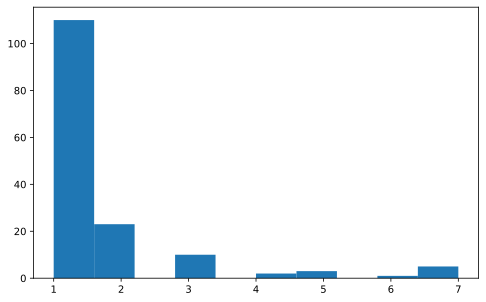

In [ ]:
#визуaл

plt.hist(count_dirs.values())

In [ ]:
# 3

crew_members_count = Counter(all_crew)
print('Участники команд, у которых больше всего фильмов в топе: ')
crew_members_count.most_common(2)

Участники команд, у которых больше всего фильмов в топе: 


[(' Robert De Niro', 9), ('Christopher Nolan', 7)]

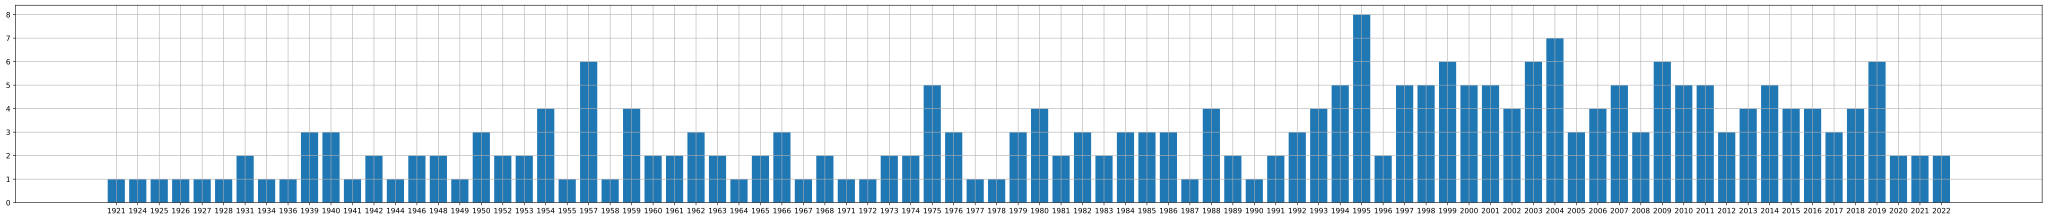

In [ ]:
#4
def bestyear(dtf):
  allyears = sorted(list(set(dtf)))
  years_dict = {}
  for year in allyears:
    years_dict[year] = 0
    for date in dtf:
      if date == year:
        years_dict[year] += 1

  plt.figure(figsize=(50, 5))
  plt.bar(range(len(years_dict)), list(years_dict.values()), tick_label=list(years_dict.keys()))
  plt.grid(True)
  plt.show()

bestyear(data.year)

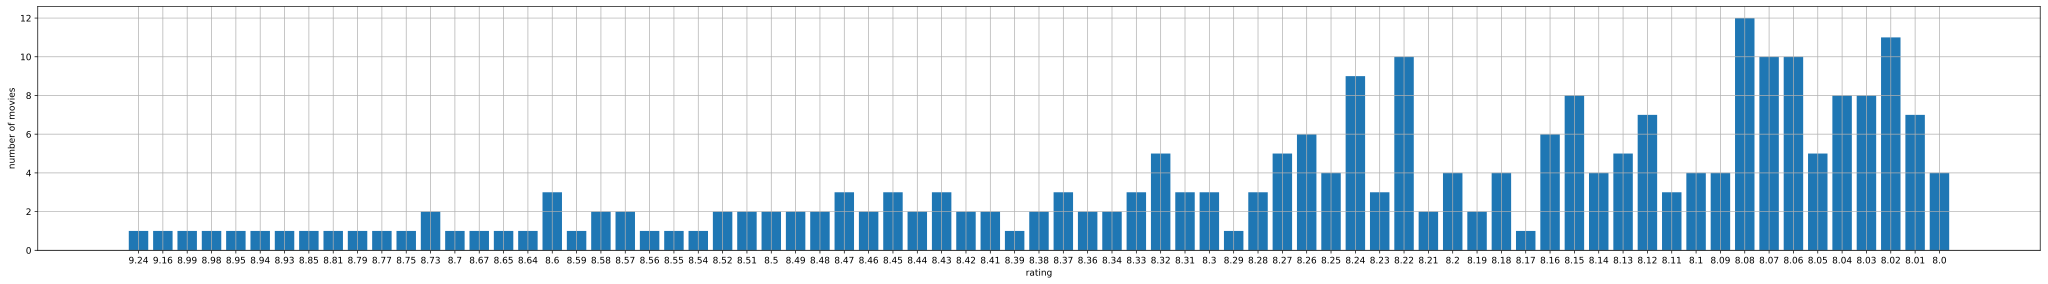

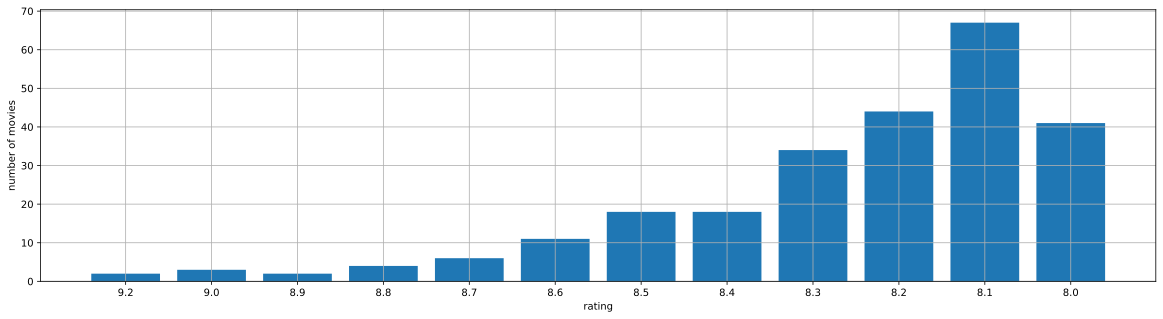

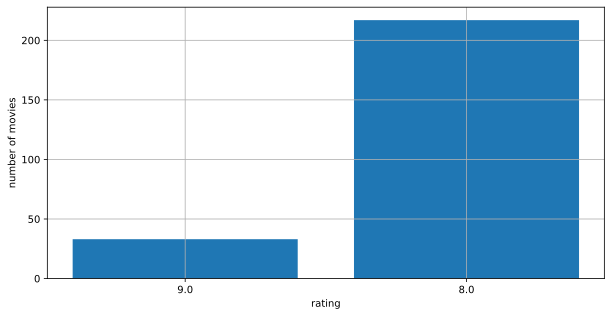

In [ ]:
#5
def ratedistribution(dtf, dcml):
  rates = {}
  for rating in dtf:
    rating = round(float(rating), dcml)
    if rating not in rates:
      rates[rating] = 1
    elif rating in rates:
      rates[rating] += 1

  if dcml==0:
    width = 10
  else:
    width = dcml * 20

  plt.figure(figsize=(width, 5))
  plt.bar(range(len(rates)), list(rates.values()), tick_label=list(rates.keys()))
  plt.grid(True)
  plt.ylabel('number of movies')
  plt.xlabel('rating')
  plt.show()

#округление до сотых
ratedistribution(data.ratings, 2)
#округление до десятых
ratedistribution(data.ratings, 1)
#округление до цедых
ratedistribution(data.ratings, 0)

In [ ]:
#6
def find_descrip(link):
  link = 'http://www.imdb.com'+link
  html_text = requests.get(link).text
  soup = BeautifulSoup(html_text, 'lxml')
  return soup.find_all(attrs={"p": "presentation"})[0].get("plot")

print(find_descrip('/title/tt0068646/'))
data["description"] = data.links.apply(find_descrip)
data.head()

IndexError: ignored

In [ ]:
film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url, headers={'User Agents': 'Mozilla/5.0'}).text
html_text

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n'

In [ ]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

IndexError: ignored

In [ ]:
#6
def descr_add(data, links_col):
  descriptions = list()
  for link in links_col:
    film_url = 'http://www.imdb.com/{}'.format(link)
    html_text = requests.get(film_url, headers={'User-Agent': 'Mozilla/5.0'}).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.find_all(attrs={"role": "presentation"})[0].get("content")
    descriptions.append(description)
  data['description'] = descriptions

In [ ]:
def descr_add(data, links_all):
  descriptions = list()
  for link in links_all:
    film_url = 'http://www.imdb.com/{}'.format(link)
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.findAll('span', class_ = "sc-16ede01-2 gXUyNh")
    descriptions.append(description)
  data['description'] = descriptions

In [ ]:
def descr_add(data, links_col):
  descriptions = list()
  for link in links_col:
    film_url = 'http://www.imdb.com/{}'.format(link)
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.find_all(attrs={"name": "description"})[0].get("content")
    descriptions.append(description)
  data['description'] = descriptions

In [ ]:
descr_add(data, data.links)
data

IndexError: ignored

In [ ]:
 <p data-testid="plot" class="sc-16ede01-6 cXGXRR"><span role="presentation" data-testid="plot-xs_to_m" class="sc-16ede01-0 fMPjMP">Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.</span><span role="presentation" data-testid="plot-l" class="sc-16ede01-1 kgphFu">Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.</span><span role="presentation" data-testid="plot-xl" class="sc-16ede01-2 gXUyNh">Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.</span></p

###

Пыталась добить 6-ю задачу с парсингом опсаний к фильмам, но не вышло. Не понимаю, почему возвращает пустой список. Перепробовала несколько комбинаций классов, тегов с кода страницы, в которм лежит именно сам текст описания фильма, но все равно не получилось. Ну и, естественно, 7-ю и частично 9-ю задачу без этого парсинга не сделать.

###


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


In [ ]:
data.head()

,movies,ratings,crew,links,title,year,no_dir,directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235289435809428,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"Frank Darabont, Tim Robbins, Morgan Freeman",Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.15616430019888,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"Francis Ford Coppola, Marlon Brando, Al Pacino",Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98969533801836,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"Christopher Nolan, Christian Bale, Heath Ledger",Christopher Nolan
3,"[\n 4.\n , [The Godfather Part II], ...",8.98407681988582,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"Francis Ford Coppola, Al Pacino, Robert De Niro",Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951205152721544,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"Sidney Lumet, Henry Fonda, Lee J. Cobb",Sidney Lumet


In [ ]:
#8
def top_rated(souped, dtf, top):
  tags = (souped.find_all(attrs = {'class': 'ratingColumn imdbRating'}))

  usernum = list()

  for tag in tags:
    podpis = tag.strong['title']
    number = int(re.findall(r'on ((\d+,)*\d{1,3})', podpis)[0][0].replace(',',''))
    usernum.append(number)

  rated_movies = pd.DataFrame(dtf)
  rated_movies['based on [rating]'] = usernum

  print(rated_movies.sort_values(by=['based on [rating]'], ascending=False)[:top])

top_rated(soup, data.title, 10)

                                                title  based on [rating]
0                            The Shawshank Redemption            2674192
2                                     The Dark Knight            2647167
13                                          Inception            2346706
11                                         Fight Club            2119676
10                                       Forrest Gump            2073961
7                                        Pulp Fiction            2049368
15                                         The Matrix            1909999
8   The Lord of the Rings: The Fellowship of the Ring            1872149
1                                       The Godfather            1853437
6       The Lord of the Rings: The Return of the King            1842880


In [ ]:
#9
titles = data['title'].tolist()
words_in_title =[]
for title in titles:
  words = title.split(' ')
  for word in words:
    words_in_title.append(word.lower())
frequent_words = Counter(words_in_title)
print('Tоп 10 слов в названии фильмов: ')
frequent_words.most_common(10)

Tоп 10 слов в названии фильмов: 


[('the', 94),
 ('of', 30),
 ('a', 12),
 ('and', 10),
 ('to', 7),
 ('for', 6),
 ('in', 5),
 ('lord', 3),
 ('rings:', 3),
 ('star', 3)]

In [ ]:
descriptions = data['description'].tolist()
words_in_descriptions =[]
for description in descriptions:
  words = description.split(' ')
  for word in words:
    words_in_descriptions.append(word.lower().strip())
frequent_words_description = Counter(words_in_descriptions)
print('Tоп 10 слов в описании фильмов: ')
frequent_words_description.most_common(10)

KeyError: ignored

In [ ]:
all_words = words_in_title + words_in_descriptions
frequent_words_all = Counter(all_words)
print('Tоп 10 слов в названии и описании фильмов: ')
frequent_words_all.most_common(10)

In [ ]:
#10

def get_genre(data):
  moviegenres = {}
  for link1 in data:
    film_url1 = 'http://www.imdb.com/{}'.format(link1)
    html_text1 = requests.get(film_url1).text
    soup1 = BeautifulSoup(html_text1, 'lxml')
    title1 = soup1("h1")[0].get_text()